In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [141]:
penguins = pd.read_csv('Data/penguins.csv')
penguins

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [142]:
# preprocessing
penguins.dropna(how='any',inplace=True)
penguins.reset_index(inplace=True,drop=True)
penguins

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
337,Gentoo,47.2,13.7,214.0,4925.0
338,Gentoo,46.8,14.3,215.0,4850.0
339,Gentoo,50.4,15.7,222.0,5750.0
340,Gentoo,45.2,14.8,212.0,5200.0


/Users/fatemeh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


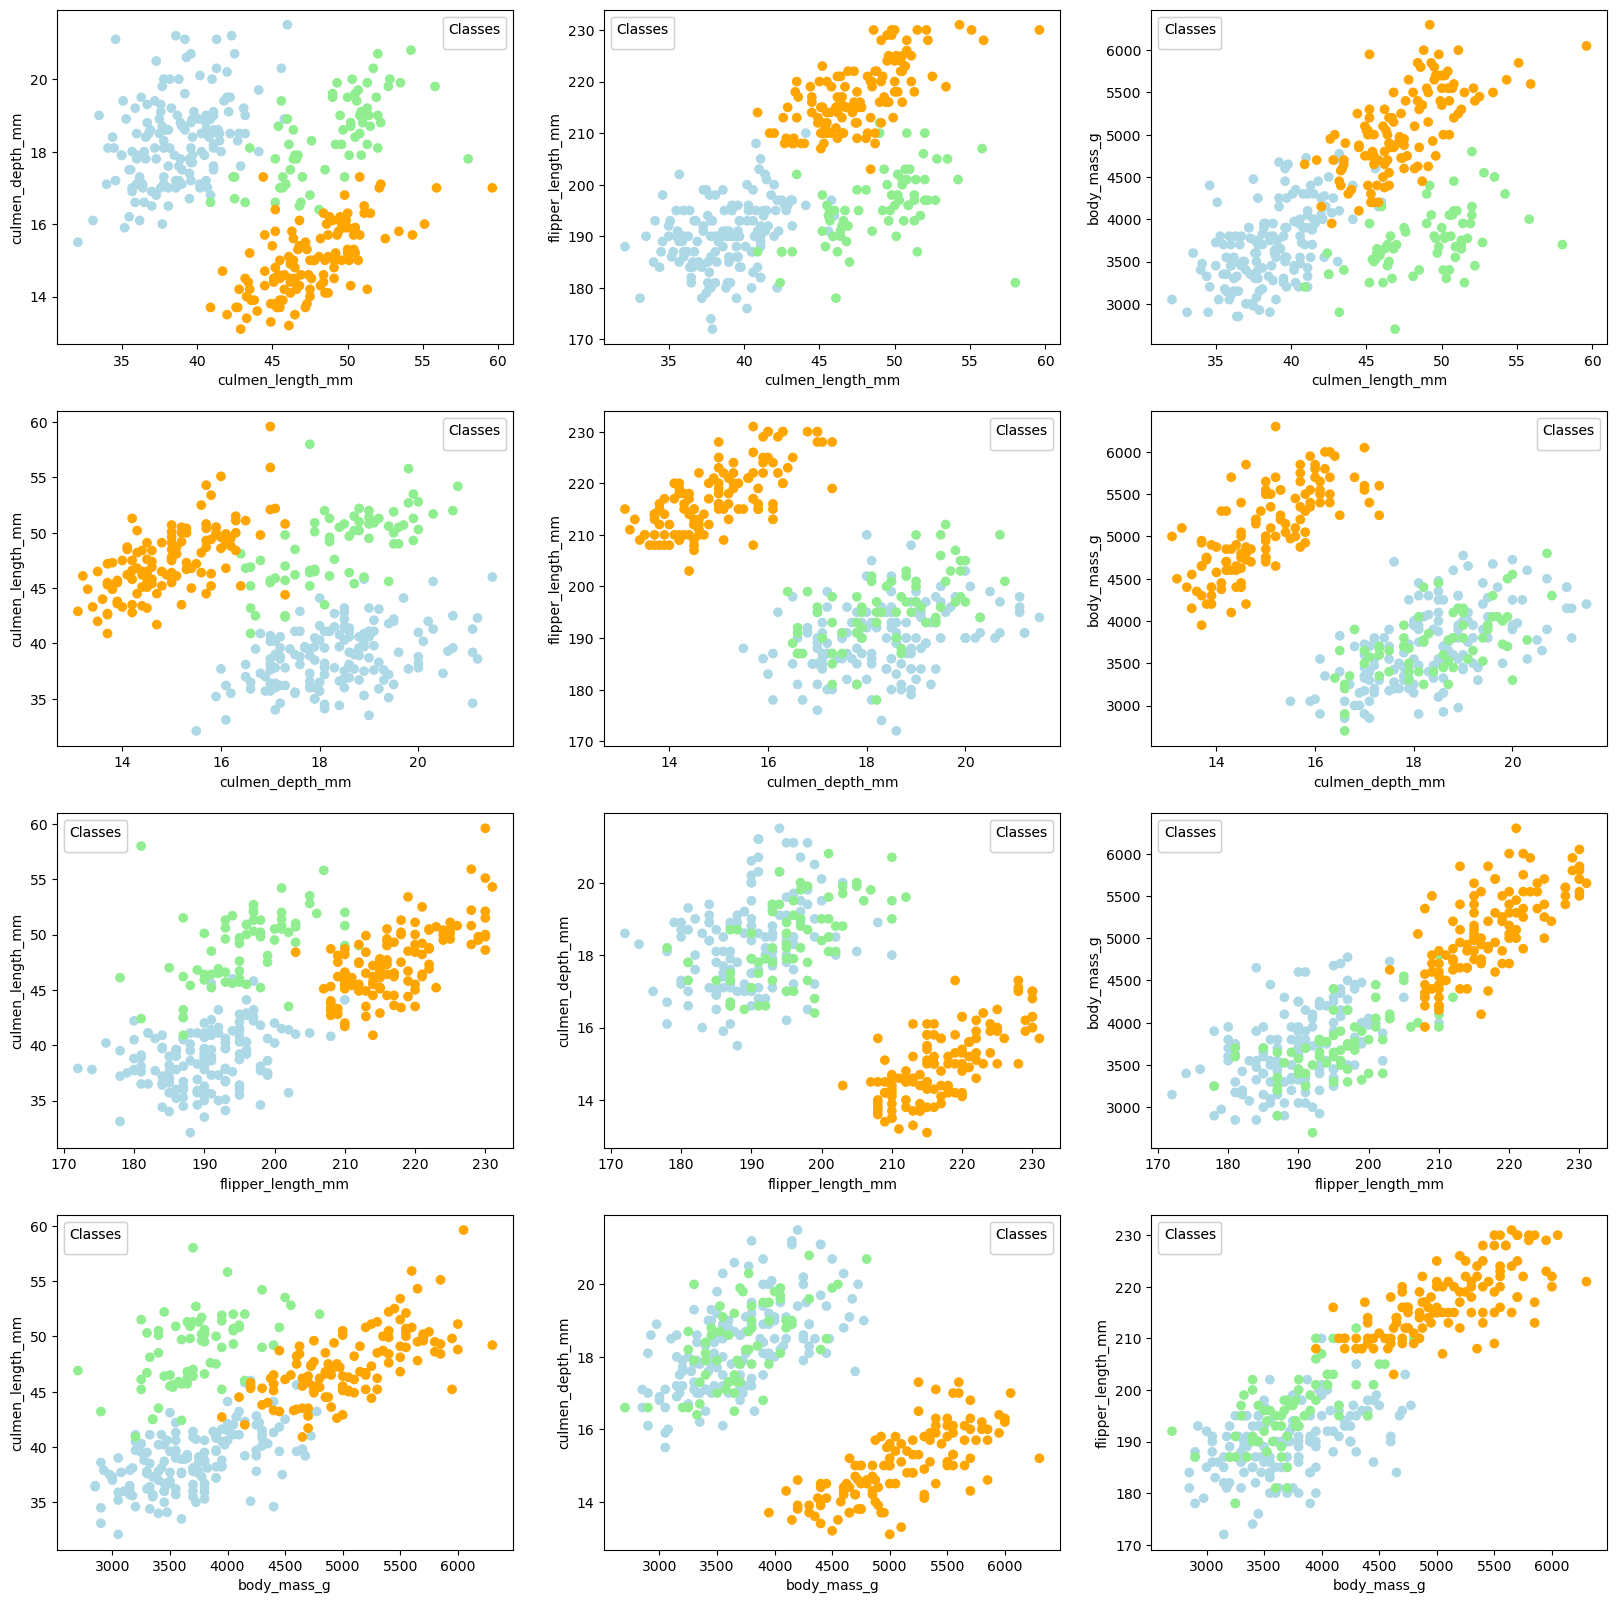

In [143]:
fig,ax = plt.subplots(4,3,figsize = (20,20))
name_column = np.array(penguins.columns[1:])
output = penguins['species'].replace(['Gentoo', 'Chinstrap', 'Adelie'],['orange','lightgreen','lightblue'])
row_index = 0
for column1 in name_column:
    column_index = 0
    for column2 in name_column[np.arange(len(name_column))!= row_index]:
        scatter = ax[row_index][column_index].scatter(penguins[column1],penguins[column2],color=output)
        legend1 = ax[row_index][column_index].legend(scatter.legend_elements()[0],
                                                     ('Gentoo', 'Chinstrap', 'Adelie'), title="Classes")
        ax[row_index][column_index].add_artist(legend1)
        ax[row_index][column_index].set_xlabel(column1)
        ax[row_index][column_index].set_ylabel(column2)
#         ax[row_index][column_index].set_title(f'{column1} vs {column2}')
        column_index += 1
        
    row_index += 1


همان طور که در شکل های بالا مشاهده می کنید٬ با استفاده از  دو ویژگی culmen_depth_mm و culmen_length_mm می توانیم به خوبی کلاس ها را با استفاده از یک خط جدا نماییم.

In [144]:
penguins.loc[penguins['species'] == 'Chinstrap'].iloc[:,1:]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
151,46.5,17.9,192.0,3500.0
152,50.0,19.5,196.0,3900.0
153,51.3,19.2,193.0,3650.0
154,45.4,18.7,188.0,3525.0
155,52.7,19.8,197.0,3725.0
...,...,...,...,...
214,55.8,19.8,207.0,4000.0
215,43.5,18.1,202.0,3400.0
216,49.6,18.2,193.0,3775.0
217,50.8,19.0,210.0,4100.0


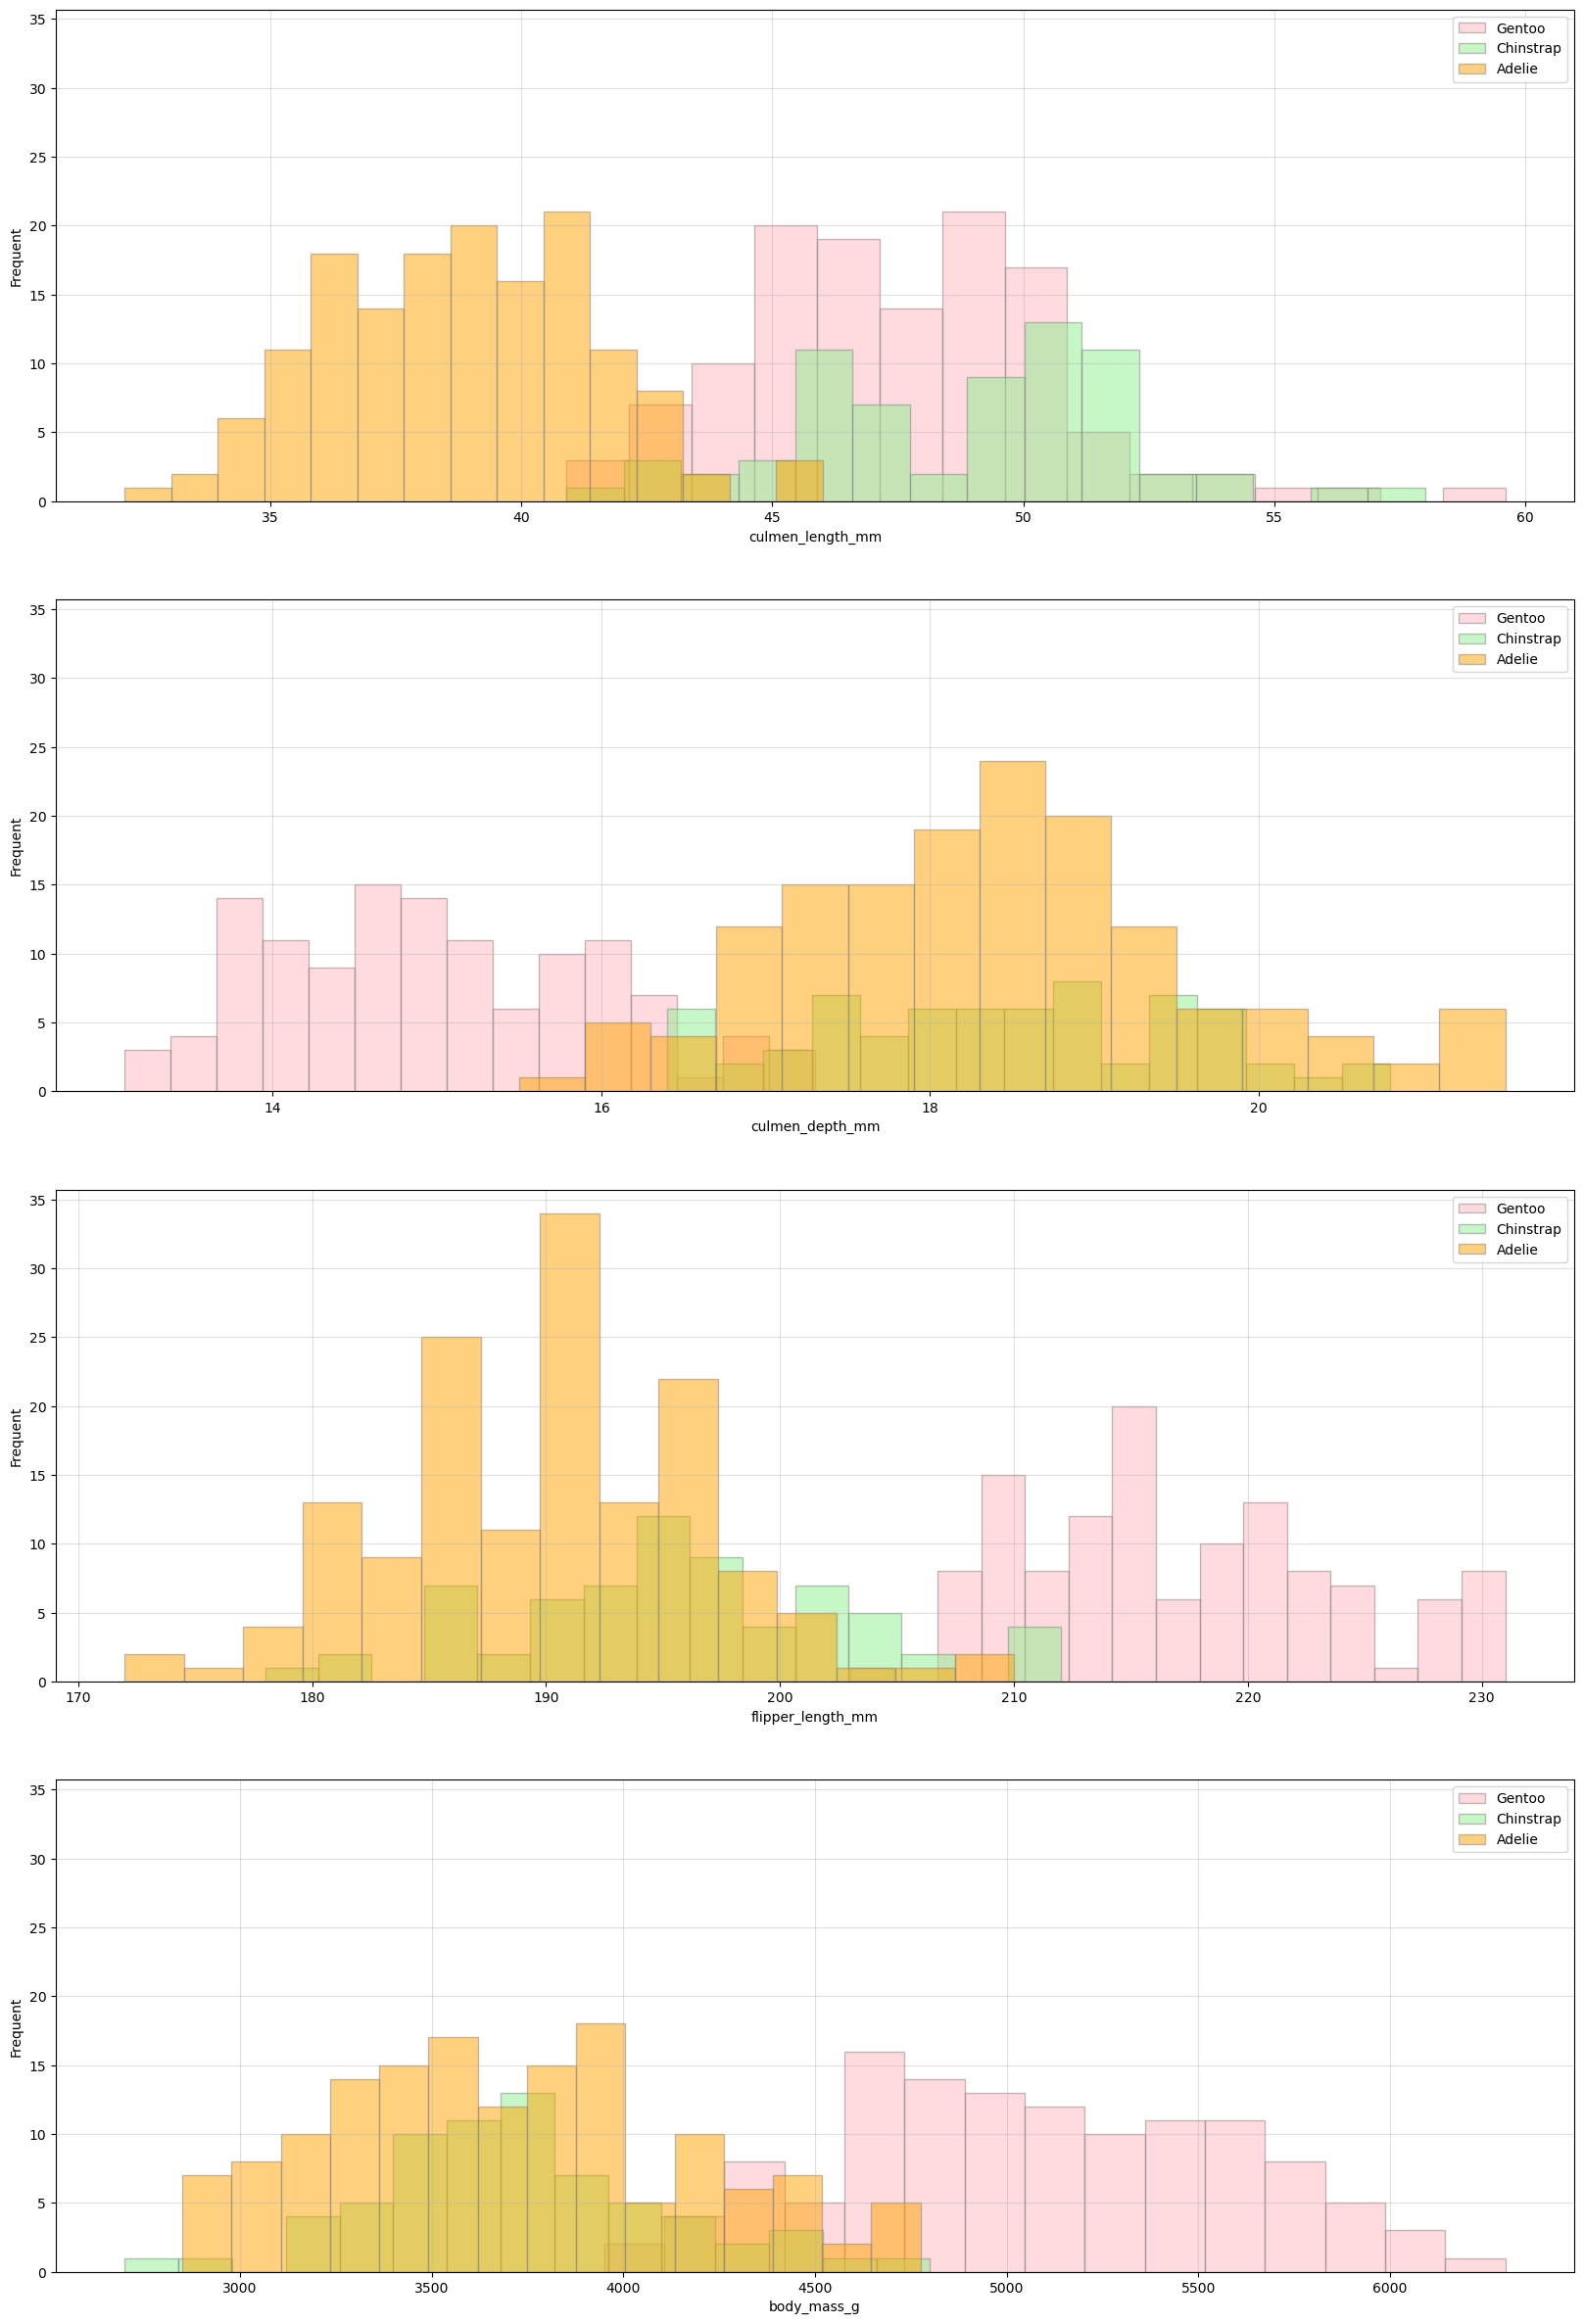

In [145]:
Gentoo = penguins.loc[penguins['species'] == 'Gentoo'].iloc[:,1:]
Chinstrap = penguins.loc[penguins['species'] == 'Chinstrap'].iloc[:,1:]
Adelie = penguins.loc[penguins['species'] == 'Adelie'].iloc[:,1:]
name_column = np.array(penguins.columns[1:])
output = penguins['species'].replace(['Gentoo', 'Chinstrap', 'Adelie'],[0,1,2])
category_name = ['Gentoo', 'Chinstrap', 'Adelie']
colors = ['lightpink', 'lightgreen','orange']
fig,ax = plt.subplots(4,1,figsize = (20,30), sharey=True)
row_index = 0    
for column1 in name_column:
    column_index = 0
    for category in [Gentoo,Chinstrap,Adelie]:
        ax[row_index].hist(category.loc[:,column1],bins = 15 , 
                           color = colors[column_index], 
                           label = category_name[column_index], 
                           alpha = 0.5,
                           linewidth = 1,
                           edgecolor = 'gray')
        column_index += 1
    
    ax[row_index].grid(True, alpha = .4)
    ax[row_index].set_xlabel(column1)
    ax[row_index].set_ylabel('Frequent')
    ax[row_index].legend()
    row_index += 1
    

## implement logistic regression without library


In [146]:
def train_test_split_df(feature , target, test_size = .2):
    data = feature.to_numpy()
    output = target.to_numpy()
    total_row = data.shape[0]
    test_row = np.round(total_row * test_size)
    test_row_num = np.random.randint(0,int(total_row),int(test_row))
    x_test = np.array([data[i] for i in test_row_num])
    y_test = np.array([output[i] for i in test_row_num])
    x_train = np.delete(data,test_row_num,axis=0)
    y_train = np.delete(output,test_row_num,axis=0)
    
    return x_train, x_test, y_train, y_test
    

In [147]:
from sklearn.utils import shuffle
penguins = shuffle(penguins)
x = penguins.iloc[:,1:]
# Standard Scaling
x = (x - x.mean())/ x.var()
y = penguins['species'].replace(['Gentoo', 'Chinstrap', 'Adelie'],[0,1,2])

xtrain, xtest, ytrain, ytest = train_test_split_df(x, y)
features = x.to_numpy()

 Z = Weight * X + Bias

In [148]:
weight = np.random.rand(3,4)

bias = np.random.rand(3,1)

In [149]:
def linear_predict(feature, weights, biases):
    # Calculate logistic score for every sample
    logitScores = np.array([np.empty([3]) for i in range(feature.shape[0])]) 
    
    for i in range(feature.shape[0]): 
        logitScores[i] = (weights.dot(feature[i].reshape(-1,1)) + biases).reshape(-1) 
    
    return logitScores

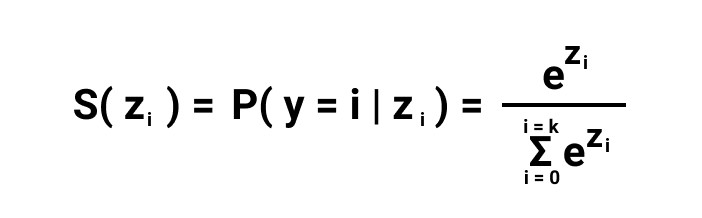

In [150]:
def softmax_normalizer(logitMatrix):
    # Calculate probabilty for logistic score
    
    probabilities = np.array([np.empty([3]) for i in range(logitMatrix.shape[0])]) # creating empty(garbage value) array for each feature set

    for i in range(logitMatrix.shape[0]):
        exp = np.exp(logitMatrix[i]) 
        sumOfArr = np.sum(exp)
        probabilities[i] = exp/sumOfArr
    return probabilities

In [151]:
def multinomial_log_reg(features, weights, biases):
    # choice best class for each sample
    logitScores = linear_predict(features, weights, biases)
    probabilities = softmax_normalizer(logitScores)
    predictions = np.array([np.argmax(i) for i in probabilities])
    return probabilities, predictions

In [152]:
probabilities, predictions = multinomial_log_reg(features,weight,bias)


##### optimize weight and bias

In [153]:
def cross_entropy_loss(probabilities, target):
    # Calculate cross entropy loss for each prediction and actual value
    n_samples = probabilities.shape[0]
    loss = 0
    for sample, i in zip(probabilities, target):
        loss += -np.log(sample[i])
    loss /= n_samples
    return loss   

In [154]:
def stoch_grad_des(learning_rate, epochs, target, features, weights, biases):
    # Calculate stochastic gradient descent 
    
    target = target.astype(int)
    loss_list = np.array([]) 

    for i in range(epochs):
        probabilities, _ = multinomial_log_reg(features, weights, biases) 
        loss = cross_entropy_loss(probabilities, target) 
        loss_list = np.append(loss_list, loss) 
        
        probabilities[np.arange(features.shape[0]),target] -= 1 
        grad_weight = probabilities.T.dot(features) 
        grad_biases = np.sum(probabilities, axis = 0).reshape(-1,1) 
        
       
        weights -= (learning_rate * grad_weight)
        biases -= (learning_rate * grad_biases)
        
    return weights, biases, loss_list

In [155]:
update_weight, update_bias, loss = stoch_grad_des(0.1, 100, ytrain, xtrain, weight, bias)
probabilities, predictions = multinomial_log_reg(xtrain, update_weight, update_bias)


In [156]:
test_probabilties, test_prediction = multinomial_log_reg(xtest, update_weight, update_bias)

#### Accuracy

In [157]:
def accuracy(prediction,target):
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == target[i]:
            correct += 1
    
    accuracy = correct / len(prediction) * 100
    return accuracy

In [158]:
accuracy(test_prediction,ytest)

97.05882352941177

#### Confusion matrix

In [159]:
def confusion_matrix(prediction, target):
    class_num = target.max() - target.min() + 1
    confusion = [[0, 0, 0] for _ in range(class_num)]
    
    true_detect = np.where(test_prediction == ytest)
    for i in range(class_num):
        for j in range(class_num):
            detect = np.where(np.logical_and(test_prediction == i , ytest == j))
            confusion[i][j] = len(detect[0])
            
    
    return np.array(confusion)
    
    


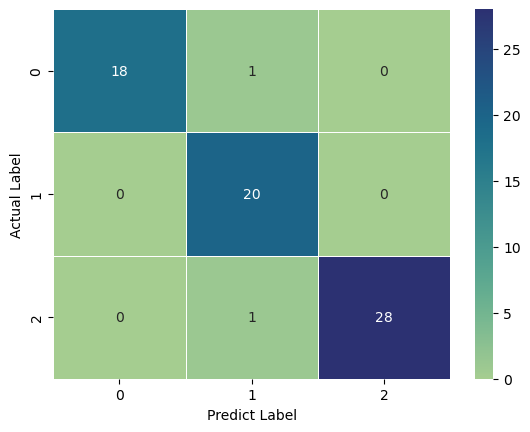

In [160]:
import seaborn as sns
cm = confusion_matrix(test_prediction,ytest)
ax = sns.heatmap(cm, annot= True, linewidths=.5, cmap = 'crest')
ax.set(xlabel='Predict Label',ylabel='Actual Label');

#### Recall

In [161]:
def recall(confusion_matrix):
    recall = 0
    for i in range(confusion_matrix.shape[0]):
        true_pos = confusion_matrix[i][i]
        false_neg = np.sum(confusion_matrix[:i,i])
        recall += true_pos/(true_pos + false_neg)
    recall = recall/int(confusion_matrix.shape[0])
    return recall* 100

In [162]:
recall(cm)

98.41269841269842

#### Precision

In [163]:
def precision(confusion_matrix):
    precision = 0
    for i in range(confusion_matrix.shape[0]):
        true_pos = confusion_matrix[i][i]
        false_pos = np.sum(confusion_matrix[i,:i])
        precision += true_pos/(true_pos + false_pos)
    precision = precision / confusion_matrix.shape[0]
    return precision*100
        

In [164]:
precision(cm)

98.85057471264368

#### F1-score

In [165]:
def f1_score(confusion_matrix):
    pr = precision(confusion_matrix)
    re = recall(confusion_matrix)
    return 2 * pr * re/(pr + re)

In [166]:
f1_score(cm)

98.63115057343693

#### Jaccard

In [167]:
def jaccard(confusion_matrix):
    jaccard = 0
    for i in range(confusion_matrix.shape[0]):
        value = confusion_matrix[i][i]
        total = np.sum(confusion_matrix[i]) + np.sum(confusion_matrix[:,i]) - value
        jaccard += value/total
    jaccard = jaccard / confusion_matrix.shape[0]
    return jaccard*100

In [168]:
jaccard(cm)

94.06588571742837

## Implement logistic Regression with sklearn

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, jaccard_score, f1_score, confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc
xtrain,xtest,ytrain, ytest = train_test_split(x, y, test_size=.2,random_state=20)
model = LogisticRegression(multi_class='multinomial')
model.fit(xtrain,ytrain)
ypredict = model.predict(xtest)


#### Accuracy

In [170]:
accuracy_score(ytest,ypredict)*100

94.20289855072464

#### Recall

In [171]:
recall_score(ytest,ypredict,average='macro')*100

91.97530864197532

#### Precision

In [172]:
precision_score(ytest,ypredict,average='macro')*100

92.08712434518885

#### F1-score

In [173]:
f1_score(ytest,ypredict,average='macro')*100

92.01120390418257

#### Jaccard

In [174]:
jaccard_score(ytest,ypredict,average='macro')*100

85.82949308755761

#### Confusion matrix

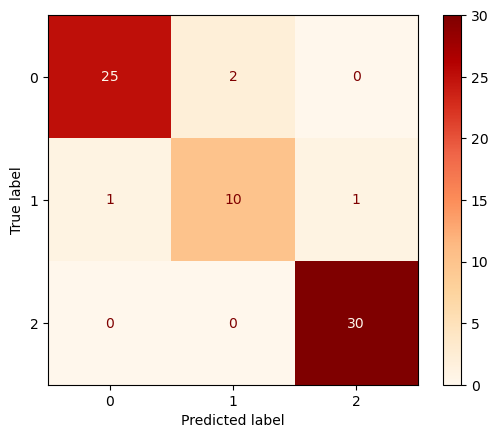

In [175]:
cm = confusion_matrix(ytest,ypredict, labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels= model.classes_)
disp.plot(cmap = 'OrRd');

#### ROC

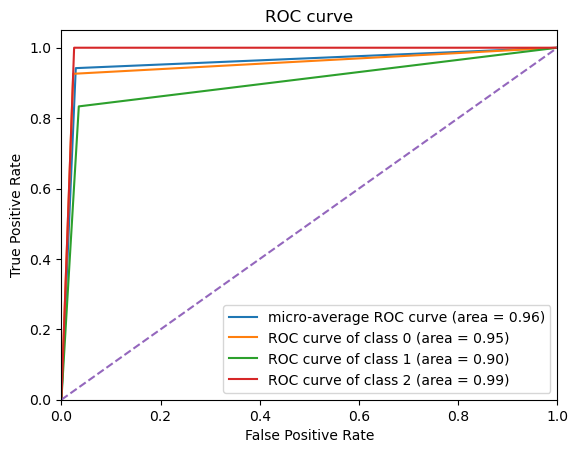

In [176]:
def convert_arr(arr):
    convert = [[0, 0, 0] for _ in range(len(arr))]
    for i,j in zip(arr,range(len(arr))):
        convert[j][i] = 1
    return np.array(convert)
    
ytest_arr = convert_arr(ytest)
ypred_arr = convert_arr(ypredict)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(ytest_arr[:, i], ypred_arr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(ytest_arr.ravel(), ypred_arr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

مقدار مساحت زیر نمودار ROC در داخل نمودار نوشته شده است.